# Analysis of Wildlife Aircraft Collisions
## Spring 2024 Data Science Project

### by Alan Liu, Andrew Cupps, Robert Xu

Member 1: Alan Liu, Contribution: 100%.
Member 2: Andrew Cupps, Contribution: 100%
Member 3: Chang Robert Xu, Contribution: 100%

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."
Alan Liu, Andrew Cupps, Chang Robert Xu 5/5/24

Overall, all three of our members worked together on all tasks, so we had equal contribution (hence why there’s a lot of repeats).

Alan Liu: Looked through various datasets to choose the right project idea. Checked column types and if they needed any further corrections in the data processing section. Responsible for Height vs Aircraft Damage analysis and the correlation matrix. Responsible for the development and tuning of the random forest model as well as helping create the decision tree and confusion matrix visualization in the ML section. Also contributed to writing up a portion of final insights and conclusion.

Robert Xu: Looked through various datasets to choose the right project idea. Identified issues with original dataset in the data processing section. Responsible for the chi squared test for correlation between the FAA Region and Aircraft Damage in the exploratory data analysis section. Responsible for the development and tuning of the random forest model in the ML section, as well as helping create the decision tree and confusion matrix visualization. Also contributed to writing up a portion of final insights and conclusion

Andrew Cupps: Looked through various datasets to choose the right project idea. Sifted through the dataset to identify specific entries that were of use/not of use in the data processing section. Responsible for analysis of relationship between speed and aircraft damage, as well as for the development and tuning of the random forest model in the ML section, as well as helping create the decision tree and confusion matrix visualization. Also contributed to writing up a portion of final insights and conclusion.

##Table of Contents

- [Introduction](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=5DWDcdjp8caM&line=1&uniqifier=1)
- [Data Collection](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=0JeiDjueDY8D)
- [Data Processing](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=-zmmxwBtHKqU)
- [Exploratory Data Analysis](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=TWpDcx52hXSX)
  - [Height vs Aircraft Damage](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=JsyeHQ_m1wG7)
  - [Region vs Aircraft Damage](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=BzUaev_l12Lz)
  - [Speed vs Aircraft Damage](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=tbu8rbhC17Xd)
  - [Aircraft Damage vs Fatalities](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=jdyFVxcNCX0x)
- [Machine Learning](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=WOIGF2qgdxwL)
  - [Data Preparation](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=vwwjgAqIlEcl)
  - [Building a Model](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=wy8TpER1VWCw)
- [Visualization of Model](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=T7SuKmQyOkPu)
- [Insights and Policy Decisions](https://colab.research.google.com/drive/1kmPui07O0GiTHgJ_5jfRSpWRuFIs7DNH?authuser=1#scrollTo=-oM4AlPE00XD)

## Introduction

What happens when an airplane collides with a wild animal? In all likelihood, the animal will be killed. But what happens to the airplane? Will it be damaged, and if so, where on the plane, and how? What factors surrounding the strike itself affect and can predict the damage caused to an aircraft in such a situation?

The FAA maintains a database of hundreds of thousands of these "wildlife strikes" where airplanes hit animals like birds, deer, and more. Some of these occur in the air, and others on the runway. While this is a rare occurrence, happening only about 140,000 times since 1990 out of tens of millions of flights each year, it is something that could be very dangerous for the passengers involved in a flight or to the structure of a plane involved.

The database we analyze includes a large amount of information regarding wildlife strikes, including but not limited to the airline, the aircraft model, the speed and altitude of the plane, and binary information on what parts of the plane in each event were struck and/or damaged. In this project, we aim to use this database to investigate what patterns emerge between the circumstances of a wildlife strike and the damage it causes. We hope that our findings could be used by the airline industry or regulators to reduce the impact of dangerous wildlife strikes and the potential harm it could cause.

Today we will walk you through the process of analyzing this database to identify these sorts of patterns, as we explore all of the steps of the Data Science Lifecycle.

In this demonstration, we will be using [Jupyter Notebook](https://jupyter.org/) and [Python](https://www.python.org/) to perform a data analysis on our target dataset.

Here are some important Python imports which we will be using throughout the project.

These imports include:

*   Pandas
*   Numpy
*   MatPlotLib
*   Math
*   SKLearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

## Data Collection

In this step of the data science lifecycle, we first need to define our objective. Because of the conditions of our objective, we are looking for a dataset related to aircraft collisions.

Data sources can vary widely, including databases, APIs, websites, text documents, sensor data, social media, surveys, and more. For this analysis, We were able to find [this](https://www.kaggle.com/datasets/faa/wildlife-strikes) dataset on [Kaggle](https://www.kaggle.com), showing many incidents of reported aircraft collisions.

When using data from common datasets, it is important to remember some of the innate biases that come with the use of this data. For example, survivorship bias may play a role in the reports of aircraft collisions, as collisions that cause fatal damage won't be reported to the dataset.

To open the data from csv format, use pandas to read the csv and look at some of the information provided.

In [ ]:
df = pd.read_csv("database.csv")
df.head()

<ipython-input-112-7918525092ae>:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("database.csv")


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


## Data Processing

Before we get into anything, let's take a look at our columns and the types of our columns to make sure that they are usable:

In [ ]:
print(df.columns)
print(df.dtypes.to_string())

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [ ]:
print(df['Precipitation'].unique())

[nan 'NONE' 'FOG' 'RAIN' 'SNOW' 'FOG, RAIN' 'RAIN, SNOW' 'FOG, SNOW'
 'FOG, RAIN, SNOW']


Looking at the data above in the data collection segment, we notice that there could be an issue with a few rows in our dataset. The second row has "UNK"/"UNKNKOWN" for Operator ID, Operator, Aircraft, and a few other columns. Let's first print it out to see if these rows are consistent.

In [ ]:
df_unknown = df[df['Operator'] == 'UNKNOWN']
df_unknown.head(20)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,129738,1990,1,8,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
19,127472,1990,1,19,UNK,UNKNOWN,PA-32,A,729,26,...,0,0,0,0,1,1,0,0,0,0
21,129740,1990,1,19,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
22,129741,1990,1,19,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
28,129742,1990,1,24,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
29,129743,1990,1,25,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


It seems evident that whenever the Operator AND the Aircraft are 'UNKNOWN', then the rest of the data is invalid. Thus, we have to drop those rows:

In [ ]:
df = df[(df['Operator'] != 'UNKNOWN') & (df['Aircraft'] != 'UNKNOWN')]
df = df.drop_duplicates()
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0


##Exploratory Data Analysis

In this section, we will explore some different relationships within the data to see if we can identify any trends without using machine learning models for prediction.

#### Height vs Aircraft Damage

We will be doing a Mann-Whitney U Test between Height and Aircraft Damage, to see if the height of the aircraft has a height of the aircraft is related to the damage done to the aircraft in collision.

- H0: Whether the aircraft is damaged isn't related to the height of the aircraft during collision.

- HA: Whether the aircraft is damaged is related to the height of the aircraft during collision.

In [ ]:
from scipy.stats import mannwhitneyu

height_df = df[df['Height'].notna() & df['Aircraft Damage'].notna()]

# Extract data for the two groups
undamaged_height = height_df[height_df['Aircraft Damage'] == 0]['Height']
damaged_height = height_df[height_df['Aircraft Damage'] == 1]['Height']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(undamaged_height, damaged_height, alternative='two-sided')

print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 429599423.0
p-value: 6.743469493454497e-222


It can be seen that the p-value of 3.033*10^-223 is much less than our significance level of 0.05. Thus, we can reject the null hypothesis. In other words, we can say that whether an aircraft is damaged is related to the height of the aircraft in collision.

Text(0.5, 1.0, 'Aircraft Damage vs Collision Height')

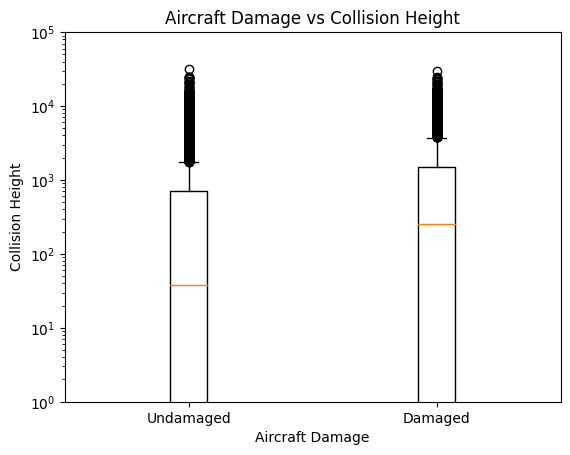

In [ ]:
plt.boxplot([undamaged_height, damaged_height], labels=['Undamaged', 'Damaged'])
plt.xlabel('Aircraft Damage')
plt.ylabel('Collision Height')
plt.yscale('log')
plt.ylim(1, 100000)
plt.title('Aircraft Damage vs Collision Height')

#### Region vs Aircraft Damage

We will also be doing a Chi-Squared Test between FAA Region and Aircraft Damage, to see if there is a correlation between the region of the report and whether the aircraft was damaged.

HO: There is no correlation between the FAA Region and Aircraft Damage. The distribution of aircraft damage is independent of the distribution of FAA region.

HA: There is a correlation between the FAA Region and Aircraft Damage. The distribution of aircraft damage is dependent of the distribution of FAA region.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['FAA Region'], df['Aircraft Damage'])
stat, p_value, dof, expected = chi2_contingency(contingency_table, lambda_='log-likelihood')
print("Chi-Squared P-value:", p_value)

Chi-Squared P-value: 4.548496499301578e-23


With a p-value of 5.723014863387546e-23, which is much less than the significance level of 0.05, we can reject the null hypothesis. It's suggested that there is a significant correlation between the FAA Region and Aircraft Damage, and that the distributions are dependent.

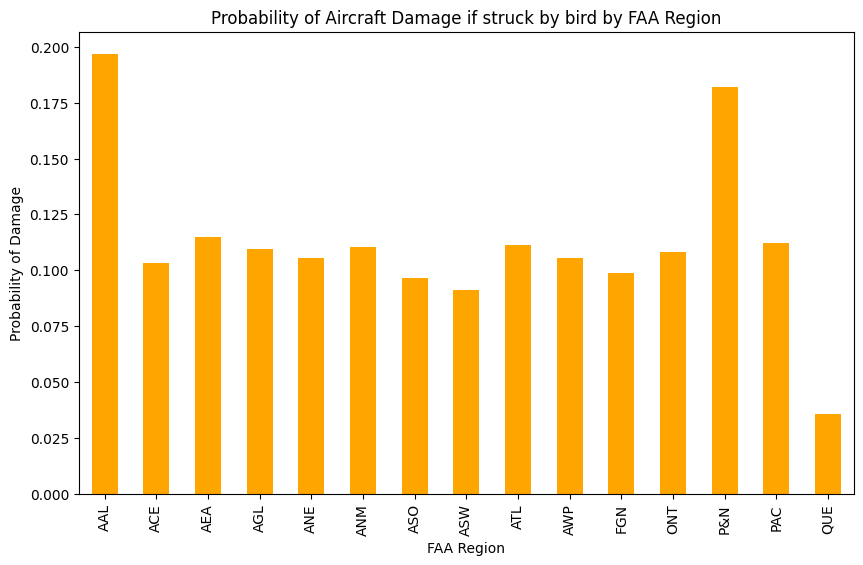

In [ ]:
grouped = df.groupby('FAA Region')['Aircraft Damage'].value_counts().unstack(fill_value=0)
grouped['Probability of Damage'] = grouped[1] / (grouped[0] + grouped[1])

grouped['Probability of Damage'].plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Probability of Aircraft Damage if struck by bird by FAA Region')
plt.xlabel('FAA Region')
plt.ylabel('Probability of Damage')
plt.show()

#### Speed vs Aircraft Damage

Finally, we will analyze the relationship between damage to the aircraft caused by a wildlife strike and the speed of the aircraft.
- H0: There is no relationship between the damage to an aircraft caused by a wildlife strike and the speed of the aircraft.
- HA: There is some statistically significant relationship between the damage to an aircraft caused by a wildlife strike and the speed of the aircraft.

In [ ]:
df2 = df[df['Speed'].notna() & df['Aircraft Damage'].notna()]
df2.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
10,107155,1990,1,8,USA,1US AIRWAYS,B-737-200,A,148,13,...,0,0,0,0,0,0,0,0,0,0
12,113914,1990,1,11,BUS,BUSINESS,HAWKER-SDLY HS125,A,443,30,...,0,0,0,0,0,0,0,0,0,0
13,2259,1990,1,11,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from scipy import stats
damage = df2[df2['Aircraft Damage'] == 1]['Speed']
nodamage = df2[df2['Aircraft Damage'] == 0]['Speed']
statistic, pvalue = stats.mannwhitneyu(damage, nodamage)
print(f"The p-value resulting from Mann-Whitney U is: {pvalue:.5f}")

The p-value resulting from Mann-Whitney U is: 0.00007


Since the p-value is much less than 0.05, the probability of a type 1 error is low enough that we reject the null hypothesis and conclude that there must be some statistically significant relationship between whether an aircraft is damaged and the speed the aircraft was travelling at the time of a strike.

Text(0, 0.5, 'Speed (mph)')

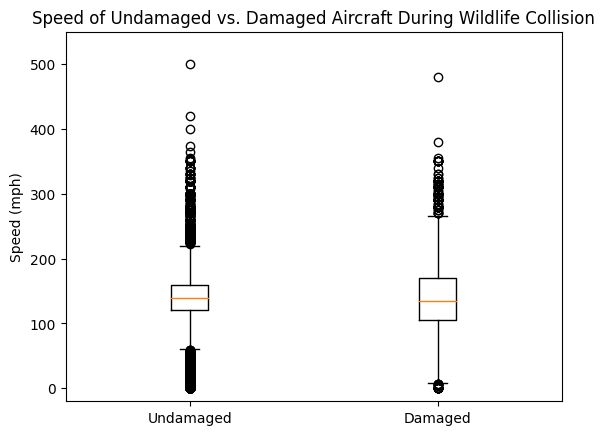

In [ ]:
plt.figure()
plt.boxplot([nodamage, damage], labels=['Undamaged', 'Damaged'])
plt.ylim(-20, 550)
plt.title('Speed of Undamaged vs. Damaged Aircraft During Wildlife Collision')
plt.ylabel('Speed (mph)')

The plot above complements the findings of the Mann-Whitney U test, since it demonstrates that the two sets of data are distributed differently. The damaged aircraft seem to have more variability in their speeds, while the undamaged aircraft appear to have outliers further beyond the two extrema of the plot. The different distributions are accounted for in the Mann-Whitney U test.

**Statistical Conclusion:**

Based off our initial findings, we noticed that there were a lot of invalid entiries indicated by the operator column being "UNKNOWN". After filtering out invalid data, we decided to do 2 Mann-Whitney U test and 1 Chi-Squared test. Our first test indicated that there is a correlation between whether the aircraft was damanged and the height of the aircraft. Our second test indicated that there is a correlation between the FAA region and whether the aircraft was damaged. The third test indicated that there is a significant relationship between whether an aircraft is damaged and the speed of the aircraft during the time of the strike.

#### Aircraft Damage vs Fatalities

We can determine which damage characteristics have the highest correlation with fatalities by looking at the correlation coefficient.

This can be visualized with a heatmap or correlation matrix, choosing all of the 'damage' columns.

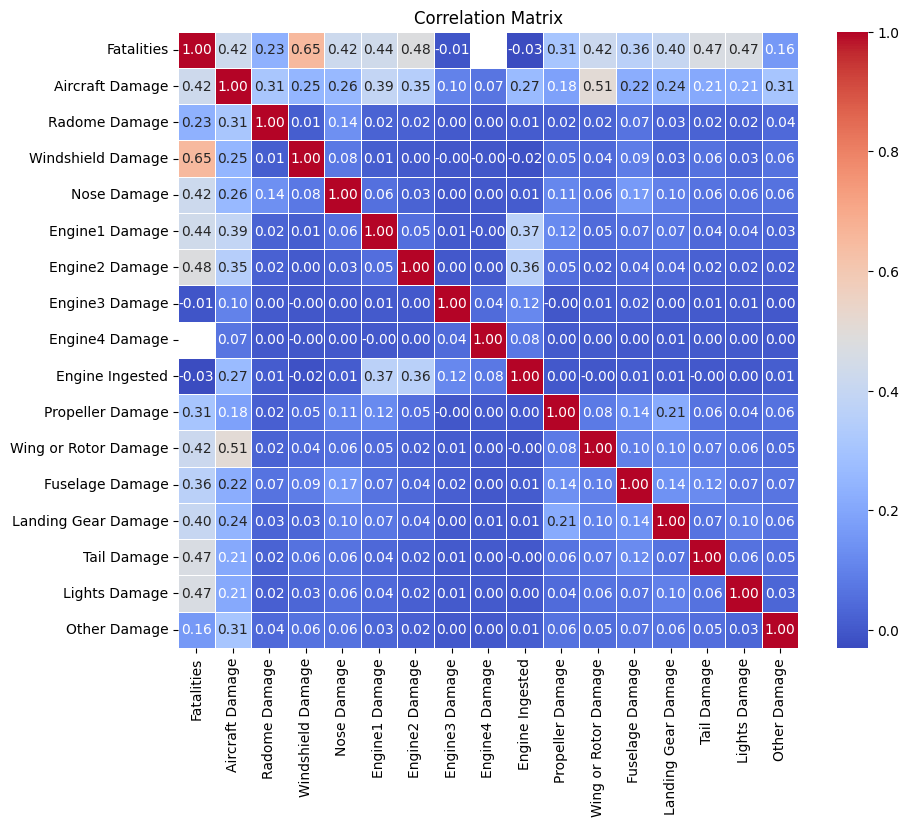

In [ ]:
damage = ['Fatalities','Aircraft Damage', 'Radome Damage',
'Windshield Damage','Nose Damage',
'Engine1 Damage','Engine2 Damage',
'Engine3 Damage', 'Engine4 Damage',
'Engine Ingested', 'Propeller Damage',
'Wing or Rotor Damage',
'Fuselage Damage','Landing Gear Damage',
'Tail Damage','Lights Damage',
'Other Damage']
damage_df = df[damage]

correlation_matrix = damage_df.corr()
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

As seen here, windshield damage has the highest correlation with fatalities, with a correlation coefficient of 0.65, much closer to 1 than the other 'damage' columns.

##Machine Learning

In this section, we will prepare our data and train a machine learning model to predict the consequences of collisions in different locations. To do this, we will use a **Random Forest Classifier** to predict whether instances of plane collisions are likely to have injuries or fatalities to the people involved.

### Data Preparation

We will be making a new column "Harm", which should include a 1 if the collision has injuries or fatalities, and 0 otherwise. We are not accounting for cases that don't report anything about injuries or fatalities. Then, we will convert all nonzero entries to 1. We will use this to train our model to predict whether a wildlife strike will result in harm based on which part of the aircraft will be hit.

Since harm is extremely rare, it's possible that a ML model trained on our data could achieve a very high accuracy by always predicting that no harm will occur. To avoid this, we will undersample strikes in which no harm occurs. There are 236 entries in which `harm` is 1, so we will only sample 500 entries where `harm` is 0.

In [ ]:
df['Harm'] = ((df['Injuries'].notnull()) & (df['Injuries'] != 0)) | ((df['Fatalities'].notnull()) & (df['Fatalities'] != 0))
df['Harm'] = df['Harm'].astype(int)

# Oversampling harm since it's incredibly rare
harmed_samples = df[df['Harm'] == 1]
unharmed_samples = df[df['Harm'] == 0].sample(n = 500, random_state = 42)

oversampled_df = pd.concat([harmed_samples, unharmed_samples])

### Building a Model

Since `Harm` is a binary variable, each entry of the dataset can be a member of either a "harm" or "no harm" group.

We will use a **Random Forest Classifier** to predict what factors affect harm in wildlife strikes.

In [ ]:
# Splitting the data into predictors (X) and target variable (y)
predictors = [ # Columns we think will have a prediction contribution to `y`
    'Radome Strike', 'Windshield Strike', 'Nose Strike', 'Engine1 Strike',
    'Engine2 Strike', 'Engine3 Strike', 'Engine4 Strike', 'Engine Ingested',
    'Propeller Strike', 'Wing or Rotor Strike', 'Fuselage Strike',
    'Landing Gear Strike', 'Tail Strike', 'Lights Strike',
    'Other Strike'
]

X = oversampled_df[predictors]
y = oversampled_df['Harm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, min_samples_leaf=5, max_depth=4)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

It can be seen that the model has a relatively high accuracy of 0.858, meaning that about 85.8% of the variation in the data can be explained by the random forest model.

## Visualization of Model

Here, we will take a sample decision tree from the random forest classifier, to visualize the predictions that are made to classify a collision by whether the passengers were harmed in any way.

In [ ]:
# Choose arbitrary sample tree to visualize
chosen_tree = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree,
          filled=True,
          rounded=True,
          class_names=['No Harm', 'Harm'],
          feature_names=predictors
          )
plt.show()

Now, we will look at a confusion matrix to show the number of true positives, true negatives, Type 1 Errors, and Type 2 Errors from our sample.

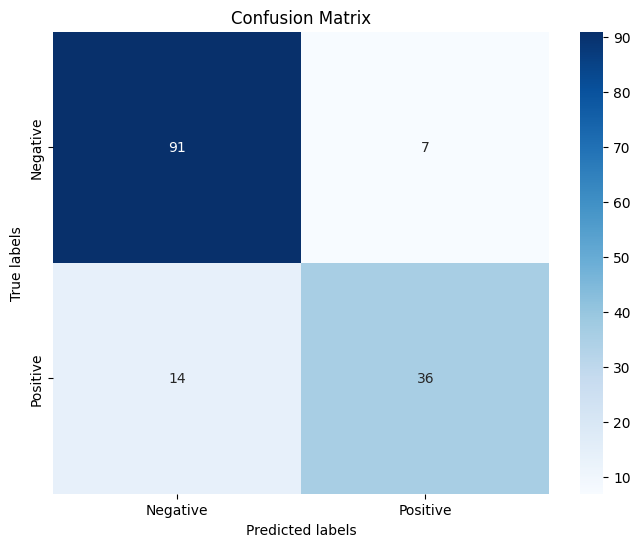

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##Insights and Policy Decisions

When making policy decisions to improve the status of aircrafts, one of the primary things we care about is passenger safety. The primary focus is to advance research in the effort of creating safe flying technology, where changes need to be made in specific parts of the plane.

From the data analysis, we can see that the highest correlation of an airplane status with fatalities is windshield damage. According to our analysis, that is the location of the plane that should be protected the most from collisions in order to prevent fatalities. However, this may be the result of survivorship bias, as planes which are struck fatally may not have reported their strike location.

From the random forest model, we can see that two of the greatest indicator of human harm is if the aircraft is stuck in the tail or the windshield. This means technological advancements in the effort of making better aircraft should go into that area, to protect personal safety. Similarly, this machine is trained on data subject to surviviorship bias, but this has a relatively high correlation as it has an accuracy of 0.858.